In [1]:
from urllib.request import urlretrieve
urlretrieve('https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv', './data/italy-covid.txt')

('./data/italy-covid.txt', <http.client.HTTPMessage at 0x2932e4b1390>)

In [2]:
import os
os.listdir('./data')

['italy-covid.txt', 'loans1.txt', 'loans2.txt', 'loans3.txt', 'total_emis.txt']

In [3]:
import pandas as pd
covid_df = pd.read_csv('./data/italy-covid.txt')

In [4]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [5]:
type(covid_df)

pandas.core.frame.DataFrame

In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [7]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [8]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [9]:
# get the headers
headers = covid_df.columns

In [10]:
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

In [11]:
# Pandas format is not similar to this
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]

In [12]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [13]:
covid_df[['new_cases', 'new_deaths']][240:]

,new_cases,new_deaths
240,1366.0,13.0
241,1409.0,5.0
242,1460.0,9.0
243,1444.0,1.0
244,1365.0,4.0
245,996.0,6.0
246,975.0,8.0
247,1326.0,6.0


In [14]:
# to pick a specific value from a row and column, use .at
covid_df.at[247, 'new_cases']

1326.0

In [15]:
covid_data_dict['new_cases'][3]

975

In [16]:
subset_df = covid_df[['date', 'new_cases']]
subset_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [17]:
# Getting the  data at a specific row
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [18]:
covid_df.new_tests.first_valid_index()

111

In [19]:
# Verifiying the index number
covid_df[110:]

,date,new_cases,new_deaths,new_tests
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [20]:
df = covid_df[111:].copy()
df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
115,2020-04-24,2646.0,464.0,95273.0
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [21]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
36,2020-02-05,0.0,0.0,NaN
44,2020-02-13,0.0,0.0,NaN
209,2020-07-27,254.0,5.0,19374.0
223,2020-08-10,463.0,2.0,10904.0
200,2020-07-18,231.0,11.0,27569.0
245,2020-09-01,996.0,6.0,54395.0
65,2020-03-05,587.0,27.0,NaN
80,2020-03-20,5322.0,429.0,NaN
180,2020-06-28,175.0,8.0,21183.0
58,2020-02-27,78.0,1.0,NaN


In [22]:
total_cases = covid_df['new_cases'].sum()
total_deaths = covid_df['new_deaths'].sum()

In [23]:
print(f"The number of reported cases is {int(total_cases)}, and the number of reported deaths is {int(total_deaths)}")

The number of reported cases is 271515, and the number of reported deaths is 35497


In [24]:
death_rate = df['new_deaths'].sum() / df['new_cases'].sum()

In [25]:
print(f"The overall reported death rate in Italy is { (death_rate*100):.2f} %")

The overall reported death rate in Italy is 12.84 %


In [26]:
initial_tests = 935310
total_tests = initial_tests + covid_df['new_tests'].sum()
total_tests

5214766.0

In [27]:
positive_rate = total_cases / total_tests
positive_rate

0.05206657403227681

In [28]:
print(f"{(positive_rate*100):.2f}% of tests in Italy led to a positive diagnosis.")

5.21% of tests in Italy led to a positive diagnosis.


What is the 7-day moving average of new cases, deaths, and tests? How has this average changed over time?

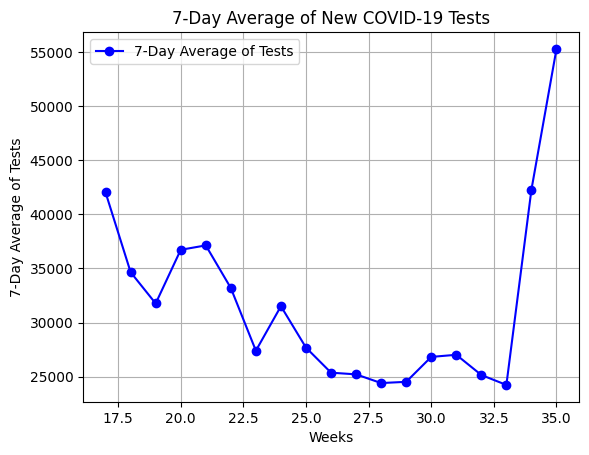

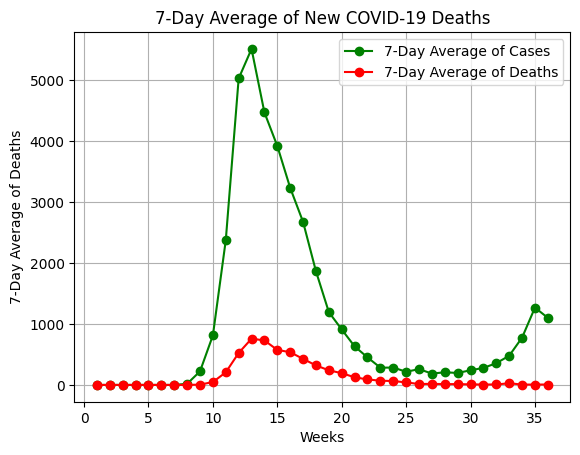

In [29]:
import matplotlib.pyplot as plt

def week_average(instances, avgof='', color='blue'):
    week_average = []
    seven = []

    for i, case in enumerate(instances):
        seven.append(case)
        if (i + 1) % 7 == 0:
            week_average.append(sum(seven) / 7)
            seven.clear()

    if seven:
        week_average.append(sum(seven) / len(seven))

    weeks = list(range(1, len(week_average) + 1))

    plt.plot(weeks, week_average, marker='o', label=f'7-Day Average of {avgof}', color=color)
    plt.xlabel('Weeks')
    plt.ylabel(f'7-Day Average of {avgof}')
    plt.title(f'7-Day Average of New COVID-19 {avgof}')
    plt.grid(True)

week_average(covid_df['new_tests'], 'Tests')

plt.legend()
plt.show()

week_average(covid_df['new_cases'], 'Cases', 'green')
week_average(covid_df['new_deaths'], 'Deaths', 'red')

plt.legend()
plt.show()


In [30]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [31]:
high_cases = covid_df['new_cases'] > 1000
high_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [32]:
covid_df[high_cases] # another way of indexing 

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [33]:
hratio = covid_df[covid_df['new_cases'] / covid_df['new_tests'] > positive_rate]
hratio

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [76]:
covid_df['positive_rate'] = covid_df['new_cases'] / covid_df['new_tests']
covid_df['positive_rate']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Name: positive_rate, Length: 248, dtype: float64

In [35]:
# getting cases that is 1000 above only
covid_df[covid_df['new_cases'] > 1000].sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [ ]:
# Another way of displaying 

""" 
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df['new_cases'] > 1000])
    
"""

In [38]:
hr_df = covid_df[covid_df['new_cases'] / covid_df['new_tests'] > positive_rate]
hr_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [39]:
# adding new column
covid_df['positive_rate'] = covid_df['new_cases'] / covid_df['new_tests']
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [41]:
#removing a column
covid_df.drop(columns=['positive_rate'], inplace=True)
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [50]:
# Displaying cases that is 3000+ avg and 400 deaths avg
covid_df[(covid_df['new_cases'] >= 3000) & (covid_df['new_deaths'] >= 400)].head(10)

,date,new_cases,new_deaths,new_tests
79,2020-03-19,4207.0,473.0,NaN
80,2020-03-20,5322.0,429.0,NaN
81,2020-03-21,5986.0,625.0,NaN
82,2020-03-22,6557.0,795.0,NaN
83,2020-03-23,5560.0,649.0,NaN
84,2020-03-24,4789.0,601.0,NaN
85,2020-03-25,5249.0,743.0,NaN
86,2020-03-26,5210.0,685.0,NaN
87,2020-03-27,6153.0,660.0,NaN
88,2020-03-28,5959.0,971.0,NaN


In [51]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [53]:
covid_df[170:175]

,date,new_cases,new_deaths,new_tests
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0


In [55]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[172, 'new_cases']) / 2 
covid_df.loc[170:175]

,date,new_cases,new_deaths,new_tests
170,2020-06-18,328.00,43.0,32921.0
171,2020-06-19,331.00,66.0,28570.0
172,2020-06-20,211.25,47.0,29875.0
173,2020-06-21,264.00,49.0,24581.0
174,2020-06-22,224.00,24.0,16152.0
175,2020-06-23,221.00,23.0,23225.0


In [56]:
covid_df['date']

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [59]:
# Make pandas recognize [date] is a date object
covid_df['date'] = pd.to_datetime(covid_df['date'])

# Year, month and day
covid_df['year'] = pd.DatetimeIndex(covid_df['date']).year
covid_df['month'] = pd.DatetimeIndex(covid_df['date']).month
covid_df['day'] = pd.DatetimeIndex(covid_df['date']).day

covid_df['weekday'] = pd.DatetimeIndex(covid_df['date']).weekday

covid_df.drop(columns=['date'], inplace=True)
covid_df

,new_cases,new_deaths,new_tests,year,month,day,weekday
0,0.0,0.0,NaN,2019,12,31,1
1,0.0,0.0,NaN,2020,1,1,2
2,0.0,0.0,NaN,2020,1,2,3
3,0.0,0.0,NaN,2020,1,3,4
4,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...
243,1444.0,1.0,53541.0,2020,8,30,6
244,1365.0,4.0,42583.0,2020,8,31,0
245,996.0,6.0,54395.0,2020,9,1,1
246,975.0,8.0,NaN,2020,9,2,2


In [69]:
# Getting the data for Junes
june_df = covid_df[covid_df['month'] == 6]
june_df[['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       8131.25
new_deaths      1404.00
new_tests     830354.00
dtype: float64

In [71]:
# Getting mean to compare
covid_df['new_cases'].mean()

1096.2671370967741

In [73]:
# average of sundays
covid_df[covid_df['weekday'] == 6].new_cases.mean()

1247.2571428571428

In [74]:
# mean of weekdays
covid_df[(covid_df['weekday'] != 6) & (covid_df['weekday'] != 5)].new_cases.mean()

1046.9550561797753

In [80]:
# Getting the mean of each month of new cases
print(f"Month 12 (2019): {covid_df[(covid_df['month'] == 12) & (covid_df['year'] == 2019)].new_cases.mean()}")

for month in range(0, 8):
    print(f"Month {month+1}: {covid_df[covid_df['month'] == month].new_cases.mean()}")

Month 12 (2019): 0.0
Month 1: nan
Month 2: 0.0967741935483871
Month 3: 30.517241379310345
Month 4: 3253.2580645161293
Month 5: 3395.0666666666666
Month 6: 937.8387096774194
Month 7: 271.0416666666667
Month 8: 216.83870967741936


In [84]:
# why bother for looping when u can group them :)
month_df = covid_df.groupby('month')[['new_cases', 'new_deaths','new_tests']].mean()
month_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,271.041667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000
